# U-Net: Convolutional Networks for Biomedical Image Segmentation
 
## Implementation of the UNet Architecture - <br>

### Original Paper<br>
The original paper can be accesss @ https://arxiv.org/abs/1505.04597

### Why Unet? <br>
*UNet, a convolutional neural network dedicated for biomedical image segmentation, was first designed and applied in 2015. In general the usecases for a typical convolutional neural network focuses on image classification tasks, where
the output to an image is a single class label, however in biomedical image visual tasks, it requires not only to distinguish whether there is a medical condition, but also to localize the area of infection i.e., a class label is supposed to be assigned to each pixel.*

### UNet Architecture <br>
**The Unet netowrk model has 3 parts:**

- The Contracting/Downsampling Path.
- Bottleneck Block.
- The Expansive/Upsampling Path.

**Contracting Path:**<br>
It consists of two 3x3 unpadded convolutions each followed by a rectified linear unit (ReLU) and a 2x2 max pooling operation with stride 2 for downsampling. After each downsampling operation, the number of feature channels are doubled.

**Bottleneck Block:**<br>
The bottleneck block connects the contracting and the expansive paths. This block performs two unpadded convolutions each with 1024 filters and prepares for the expansive path.

**Expansive Path:**<br>
Every step in the expansive path consists of an upsampling of the feature map followed by a 2x2 convolution (“up-convolution”) using transposed convolutions, a concatenation with the correspondingly feature map from the contracting path, and two 3x3 convolutions, each followed by a ReLU. Transposed convolution is an upsampling technique to expand the size of images.

**Skip Connections:**<br>
The skip connections from the contracting path are concatenated with the corresponding feature maps in the expansive path. These skip connections provide higher resolution features to better localize and learn representations from the input image. They also help in recovering any spatial information that could have been lost during downsampling

**Final Layer:**<br>
At the final layer a 1x1 convolution is used to map each (64 component) feature vector to the desired number of classes.

***The entire network consists of a total of 23 convolotional layers.***


### UNet Network Diagram <br>

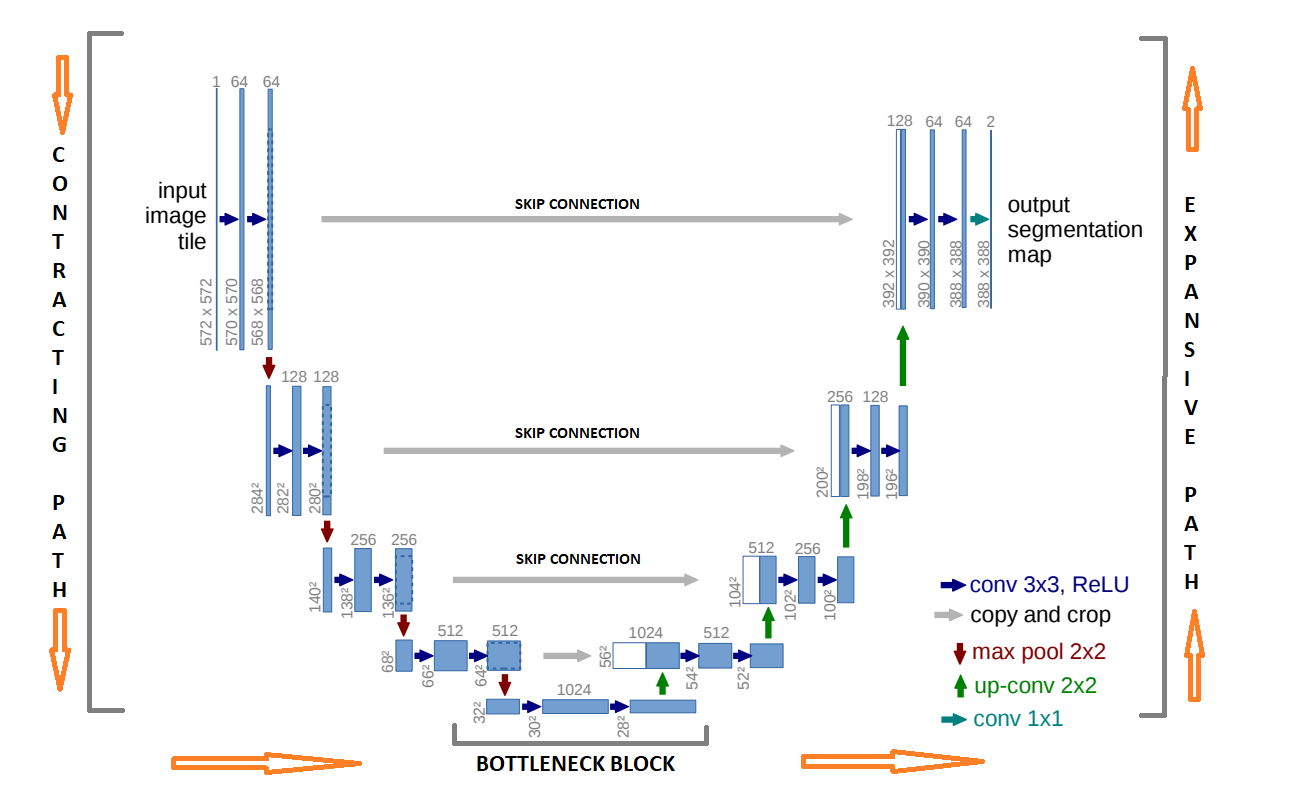

Image Reference - https://arxiv.org/pdf/1505.04597.pdf

### Implementation

In [1]:
# import the UNet design framework module.
from Unet import Unet

In [2]:
# Initialize the Unet with the default parameters. 
# The default params are the one that were used in the original paper.
# Input shape - (572, 572, 1), 
# filters 64, 128, 256, 512, 1024 at each convolutional block and 
# unpadded convolutions.
unet = Unet()

In [3]:
# call the build netowrk API to build the network.
model = unet.Build_UNetwork()

In [4]:
# compile & summarize the model
if model is not None:
    unet.CompileAndSummarizeModel(model = model)

Model: "UNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 572, 572, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 570, 570, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 568, 568, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 284, 284, 64) 0           conv2d_1[0][0]                   
_______________________________________________________________________________________________

In [5]:
if model is not None:
    unet.plotModel(model, dpi = 112)

### UNet Network as Designed <br>

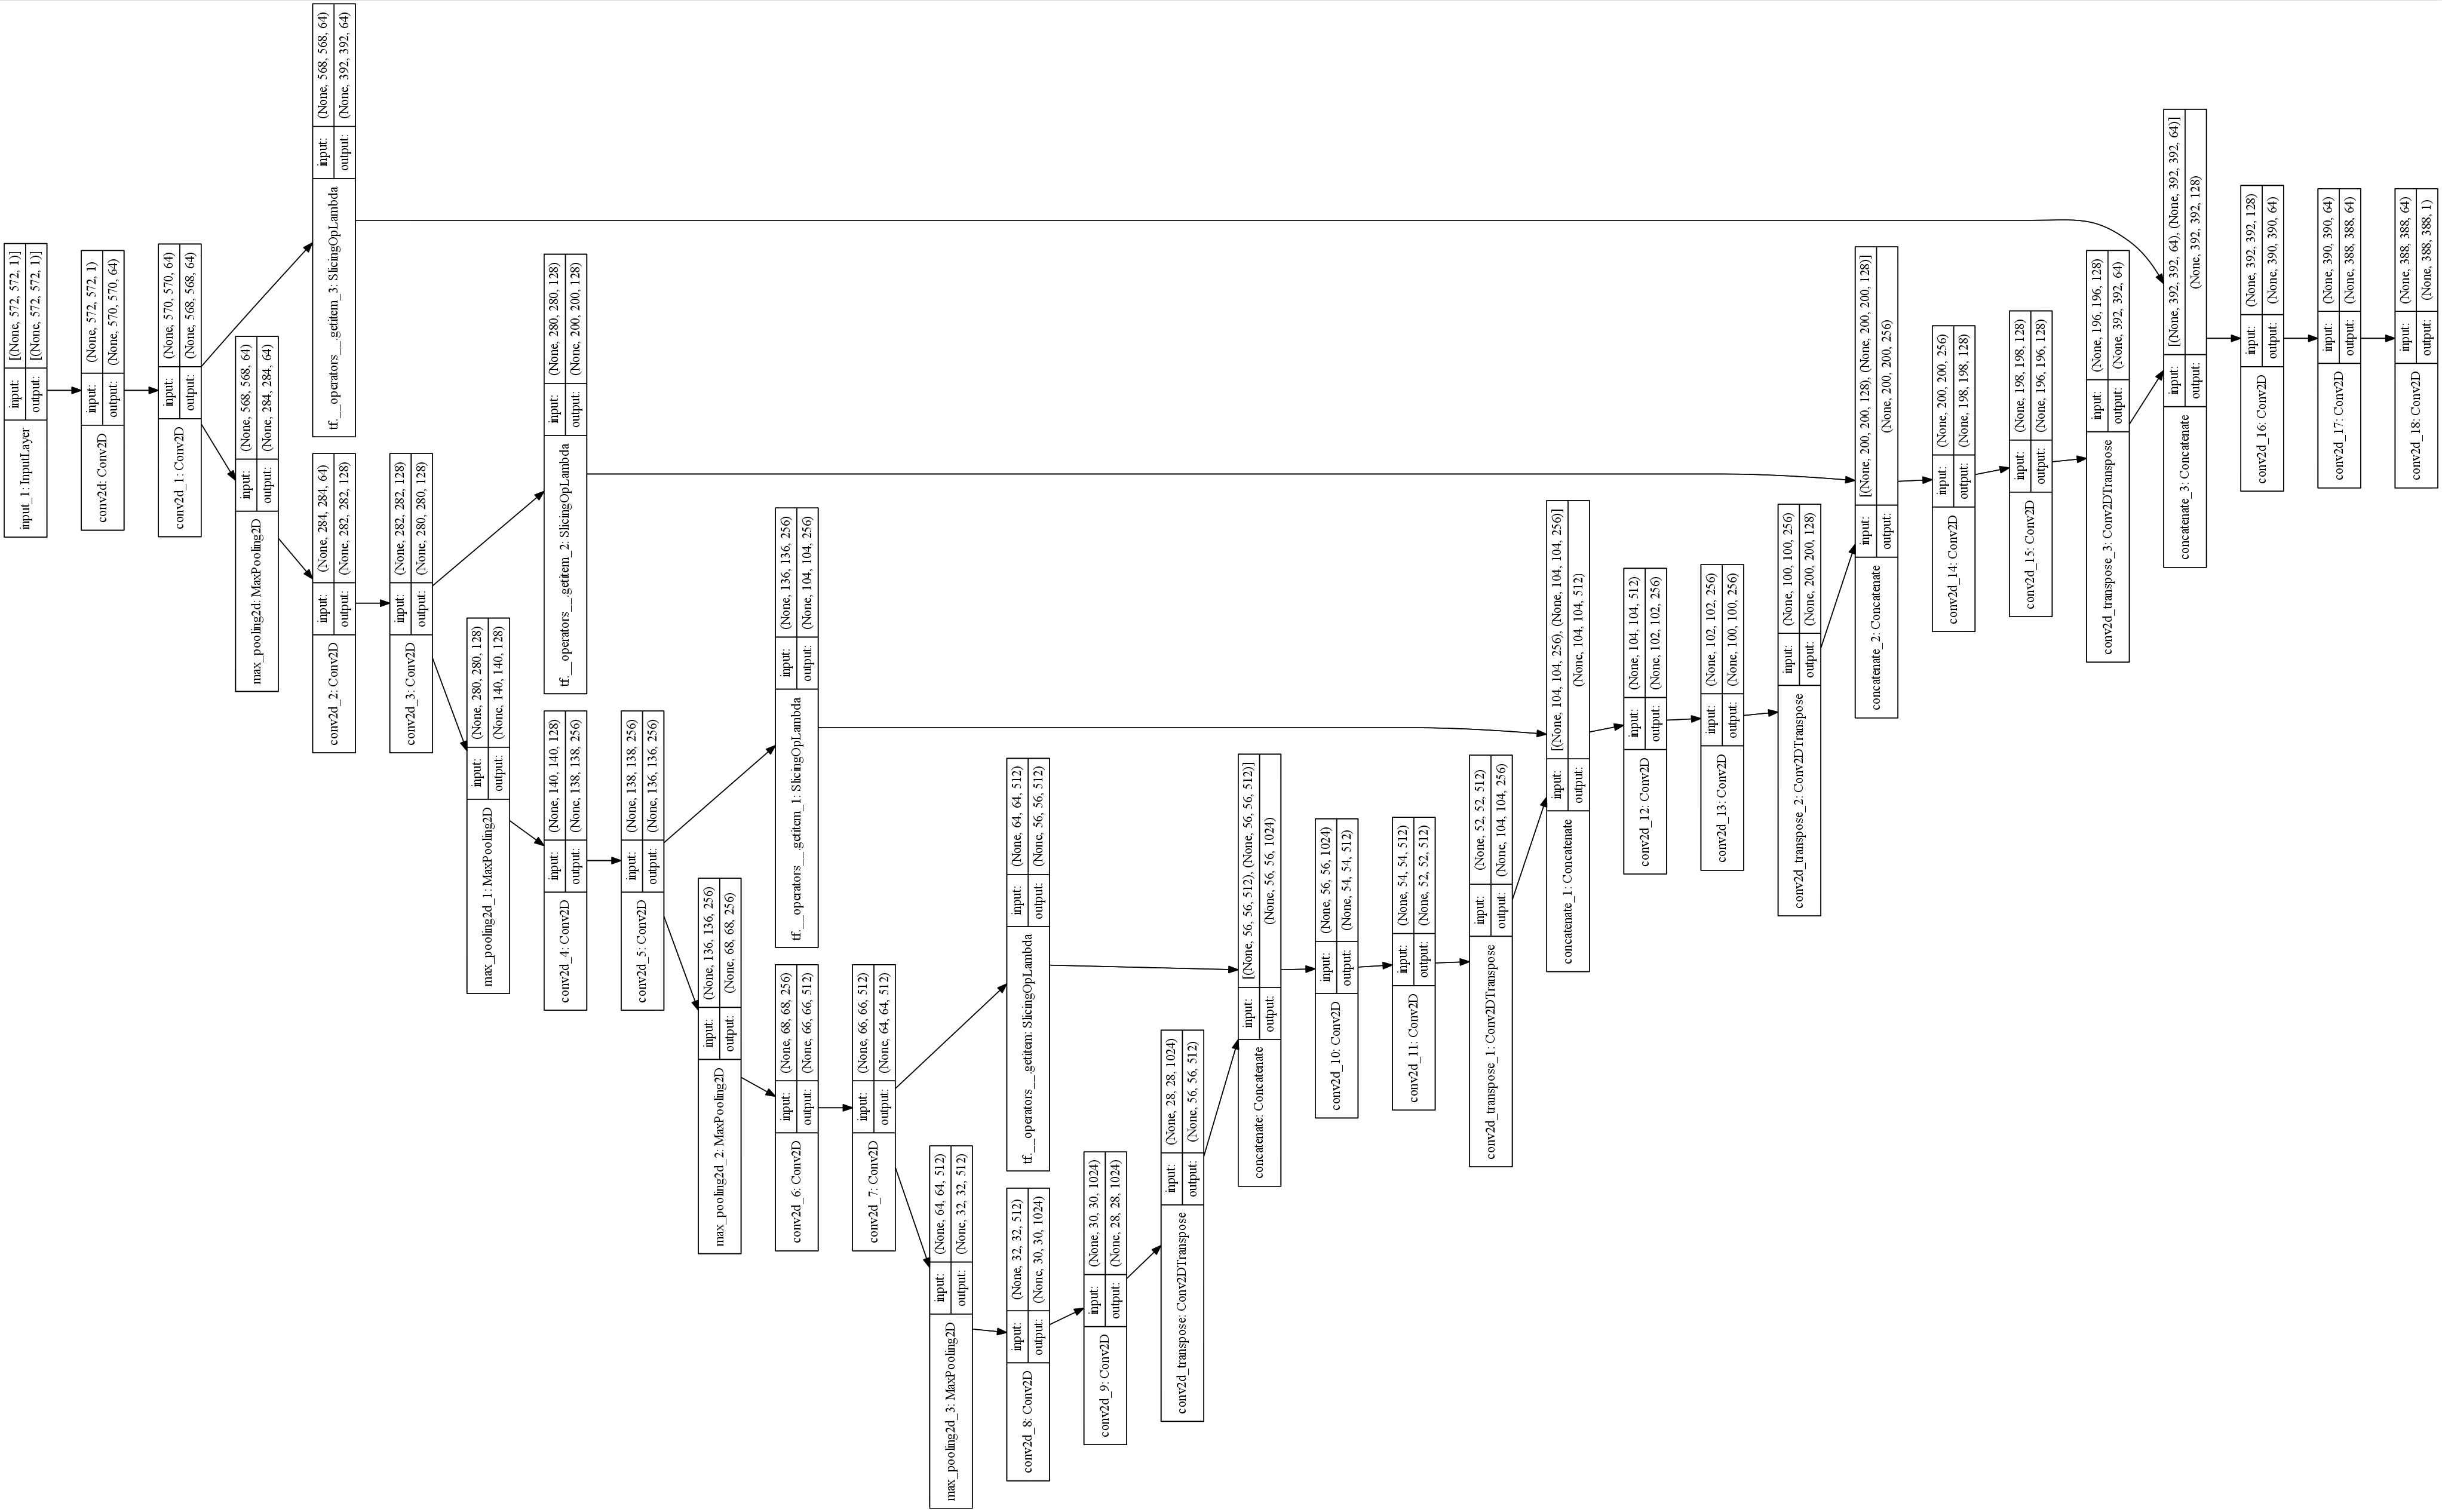


AN application of the UNet model is implemented @ [UNet In Action](https://github.com/sauravmishra1710/U-Net---Biomedical-Image-Segmentation/blob/main/UNet%20In%20Action.ipynb). The objective of the task is to segment and identify the cell nuclei. The dataset is taken from a kaggle chellenge - [2018 Data Science Bowl - Find the nuclei in divergent images to advance medical discovery](https://www.kaggle.com/c/data-science-bowl-2018/). 

**References:** <br>

1. Ronneberger O, Fischer P, Brox T. U-Net: Convolutional Networks for Biomedical Image Segmentation. CoRR [Internet]. 2015;abs/1505.04597. Available from: http://arxiv.org/abs/1505.04597

2. Implementing original U-Net from scratch using PyTorch by Abhishek Thakur. Available at https://www.youtube.com/watch?v=u1loyDCoGbE